## performing Two sample t-test (unpaired or independent t-test).

In [1]:
import pandas as pd
import researchpy as rp
import scipy.stats as st
from bioinfokit.analys import stat
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv(r'C:\Users\mahmoud\Desktop\cdsp\statstic.csv', encoding='cp1252')
df.head(4)

,Year,Sex,Age group (years) at date of injury,Geographic region where injury occurred,Employment status,Occupation,Injury/illness/disease group,Type of injury/illness/disease,Industry,Industry subgroup,Value,Measure,Status
0,2002,Total,Total,Total,Total,Total,Total,Total,Total,Total,258.4,Number of claims in thousands,Final
1,2003,Total,Total,Total,Total,Total,Total,Total,Total,Total,258.1,Number of claims in thousands,Final
2,2004,Total,Total,Total,Total,Total,Total,Total,Total,Total,261.1,Number of claims in thousands,Final
3,2005,Total,Total,Total,Total,Total,Total,Total,Total,Total,262.0,Number of claims in thousands,Final


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     2945 non-null   int64  
 1   Sex                                      2945 non-null   object 
 2   Age group (years) at date of injury      2945 non-null   object 
 3   Geographic region where injury occurred  2945 non-null   object 
 4   Employment status                        2945 non-null   object 
 5   Occupation                               2945 non-null   object 
 6   Injury/illness/disease group             2945 non-null   object 
 7   Type of injury/illness/disease           2945 non-null   object 
 8   Industry                                 2945 non-null   object 
 9   Industry subgroup                        2945 non-null   object 
 10  Value                                    2945 no

In [4]:
df.describe()

,Year,Value
count,2945.000000,2945.000000
mean,2010.772496,41.610696
std,4.757987,61.312452
min,2002.000000,0.000000
25%,2007.000000,3.200000
50%,2011.000000,13.000000
75%,2015.000000,58.000000
max,2018.000000,563.000000


### we will take (Value) as a dependent feature and (Measure) as independent feature.

In [5]:
df['Status'].value_counts()

Final          2745
Provisional     200
Name: Status, dtype: int64

### since our groups not equel we will take an equel sample from each other. 

In [6]:
df['Status']= df['Status'].replace({'Final', 'Provisional'},{'A','B'})

In [7]:
df= df.groupby('Status').apply(lambda x: x.sample(30))

In [8]:
# another way to take an equel samples.

# def new (x):
#     for i in x:
#         m= x.sample(30)
#     return m

# df3= df.groupby('Status').apply(new)

### take the  equel samples to dataframe, we gonna used to perform t-test with "bioinfokit" library.

In [9]:
df= df.loc[:,["Status","Value"]]

In [10]:
a= df.loc[df['Status'] == 'A']['Value']
b= df.loc[df['Status'] == 'B']['Value']

In [11]:
df.sample(frac=1, random_state=1).head(10)

Status  Value
Status                   
B      211       B   60.6
       403       B    1.1
A      33        A  166.4
B      242       B   17.6
       1746      B   17.0
       1552      B    8.0
       1020      B    2.7
       661       B   43.7
       2833      B   91.0
A      492       A   17.2

### summary stats for poth samples.

In [12]:
rp.summary_cont(a)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Value,30.0,42.7067,61.7114,11.2669,19.6632,65.7501


In [13]:
rp.summary_cont(b)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Value,30.0,39.8667,49.3913,9.0176,21.4237,58.3097


### using scipy to perform unpaired t-test.

In [14]:
stat, p = st.ttest_ind(a, b ,equal_var=True)

print('stats = {0:.3f}'.format(stat)," & ", 'p = ', p, "\n")

if p > 0.05:
    
    print("there is no significance difference between the two sample", "\n")
else:
    print("there is a significance difference between the two sample")

stats = 0.197  &  p =  0.8446754275802838 

there is no significance difference between the two sample 



### using bioinfokit to perform unpaired t-test.

In [15]:
from bioinfokit.analys import stat 
res= stat()

res.ttest(df=df, xfac= 'Status', res='Value' ,test_type=2)
print(res.summary)


Two sample t-test with equal variance

------------------  ----------
Mean diff             2.84
t                     0.196796
Std Error            14.4312
df                   58
P-value (one-tail)    0.422338
P-value (two-tail)    0.844675
Lower 95.0%         -26.0472
Upper 95.0%          31.7272
------------------  ----------

Parameter estimates

Level      Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
A              30  42.7067    61.7114     11.2669         19.6632        65.7501
B              30  39.8667    49.3913      9.01757        21.4237        58.3097



### using statsmodels to perform unpaired t-test.

In [16]:
from statsmodels.stats.weightstats import ttest_ind

test = ttest_ind(a, b)

print('stats = {0:.3f}'.format(test[0])," & ", 'p = ' , test[1], "\n")

if test[1] > 0.05:
    
    print("there is no significance difference between the two sample", "\n")
else:
    print("there is a significance difference between the two sample")

stats = 0.197  &  p =  0.844675427580285 

there is no significance difference between the two sample 



## check for normality assumption.
+ shapiro test for normality.

In [17]:
stat, p = st.shapiro(a)
print('stats = {0:.3f}'.format(stat)," & ", 'p = ', p, "\n")

if p > 0.05:
    print("Probably Gaussian", "\n")
else:
    print("Probably NOT Gaussian", "\n")
    print (" ", '*'*30, "\n")

stat, p = st.shapiro(b)
print('stats = {0:.3f}'.format(stat)," & ", 'p = ', p, "\n")

if p > 0.05:
    print("Probably Gaussian")
else:
    print("Probably NOT Gaussian")

stats = 0.684  &  p =  9.195435950459796e-07 

Probably NOT Gaussian 

  ****************************** 

stats = 0.758  &  p =  1.2114297533116769e-05 

Probably NOT Gaussian


### plot the distribution of the two samples.
+ Levene's test of homogeneity of variances.

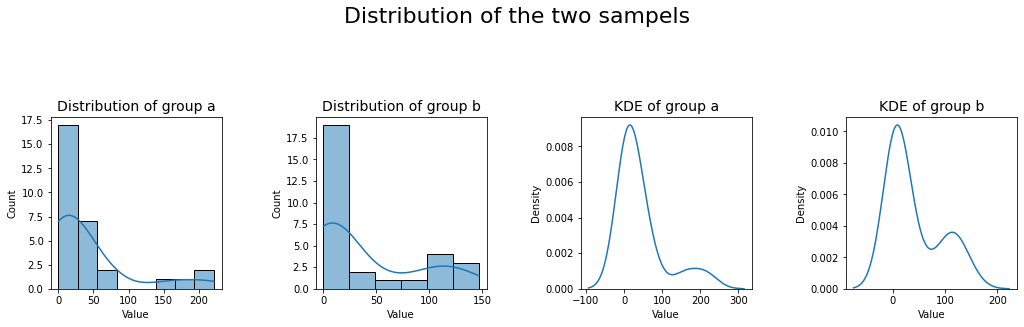

In [18]:
fig, axes = plt.subplots(1, 4, figsize= (15,5))

sns.histplot(a , kde= True ,ax= axes[0])
sns.histplot(b , kde= True, ax= axes[1])
sns.kdeplot(a ,ax= axes[2])
sns.kdeplot(b ,ax= axes[3])

plt.suptitle('Distribution of the two sampels' ,fontsize= 22)
axes[0].set_title('Distribution of group a' ,fontsize= 14)
axes[1].set_title('Distribution of group b' ,fontsize= 14)
axes[2].set_title('KDE of group a' ,fontsize= 14)
axes[3].set_title('KDE of group b' ,fontsize= 14)

plt.tight_layout(pad = 4)

### probability plot correlation coefficient (PPCC).

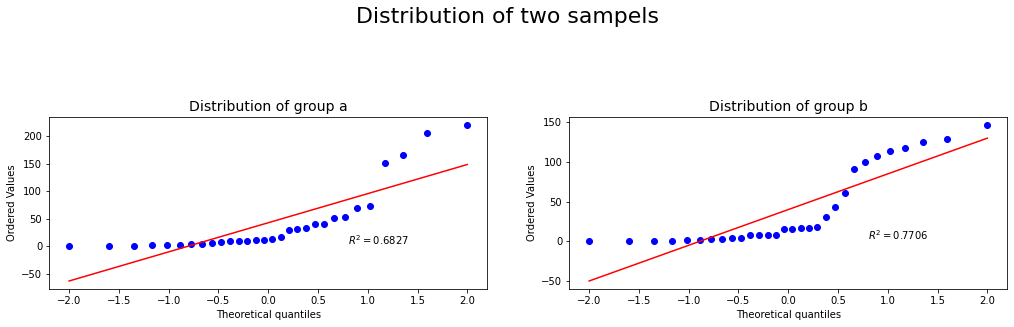

In [19]:
fig, axes = plt.subplots(1, 2, figsize= (15,5))

norm, stat= st.probplot(a, plot=axes[0], rvalue=True)
norm, stat= st.probplot(b, plot=axes[1], rvalue=True)

plt.suptitle('Distribution of two sampels' ,fontsize= 22)
axes[0].set_title('Distribution of group a' ,fontsize= 14)
axes[1].set_title('Distribution of group b' ,fontsize= 14)

plt.tight_layout(pad = 4);

> as we can see the distribution of the two sampels are right skewed distribution and the p-value bigger than Significance Level in shapiro test even though that the calculated PPCC $ R^2 $ = 0.6827,0.7706 is ever so smaller than the table PPC $ R^2 $ = 0.9634 that indicated non-normality beacuse it works better on bigger samples.
###  so the assumption of normality indicates that the two samples are not normally distributed,(Mann–Whitney U test).

### HOMOGENEITY OF VARIANCE ASSUMPTION.

stats = 0.016  &  p =  0.8992107164830152 

there is no significant difference in their varability 



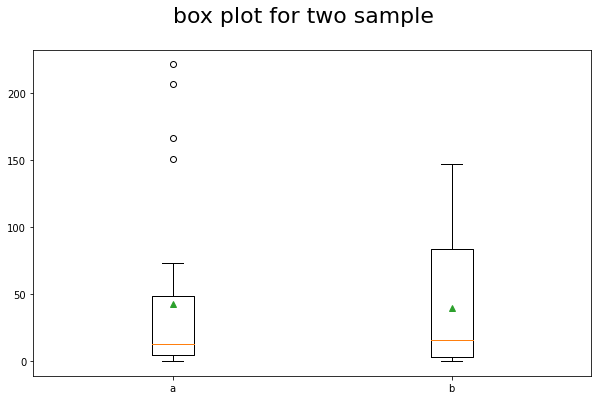

In [20]:
stat, p= st.levene(a,b)

print('stats = {0:.3f}'.format(stat), " & " , 'p = ', p, "\n")

if p > 0.05:
    print("there is no significant difference in their varability", "\n")
else:
    print("there is a significant difference in their varability", "\n")
    print (" ", '*'*30, "\n")

fig= plt.figure(figsize=(10,6))

plt.suptitle('box plot for two sample' ,fontsize= 22)

data=[a,b]
plt.boxplot(data, labels=["a","b"], showmeans=True)

plt.show()

> The Levene's test of homogeneity of variances is not significant which indicates that the two groups have non- statistically significant difference in their varability and The graphical testing of homogeneity of variances supports the statistical testing findings which is the groups have equal variance.


### since our samples are not normally distributed but have equel variance then we gonna apply (Mann–Whitney U test) for non normality.

## Mann–Whitney U test for non normality.

In [21]:
stat, p= st.mannwhitneyu(a, b, alternative='two-sided')

print('stats = {0:.3f}'.format(stat)," & ", 'p = ' , p, "\n")

if p > 0.05:
    
    print("there is no significance difference between the two sample", "\n")
else:
    print("there is a significance difference between the two sample")

stats = 474.500  &  p =  0.7226680720896655 

there is no significance difference between the two sample 



## Interpretation.
> since our data is not normally distributed and stats_test = 474.500 , p_value > than the critical value then There is no statistically significant difference between the two samples.

## Hint.
> If the assumption(s) of normality or homogeneity of variances are not met then a route to consider is transforming the data. If this is the route that is decided on to try and correct not meeting one or both of the assumptions don't forget to back-transform the data for reporting and interpreting. Some data transformations effect normality and variances differently so different transformations should be tested. There are of course, common transformations that are used like Log Transformation, Square-root Transformation and Reciprocal Transformation.